# Code to plot the Hydrogen mass functions with satelittes and centrals separately and on the same graph for z = 1


In [1]:
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput
from Functions import * # See Functions.py if unsure on functions used throughout this script

# get galaxy catalogue (See Functions.py)
gals, sim_props, snaplist, fname_in = get_gal_catalogue(250) 
print_units(fname_in)  # print units of gal props


units
=====
BHemissivity : 1e60 photons
BaryonFracModifier : None
BlackHoleAccretedColdMass : 1e10 solMass
BlackHoleAccretedHotMass : 1e10 solMass
BlackHoleMass : 1e10 solMass
CentralGal : None
ColdGas : 1e10 solMass
Cos_Inc : None
DiskScaleLength : Mpc
EffectiveBHM : 1e10 solMass
EjectedGas : 1e10 solMass
FOFMvir : 1e10 solMass
FOFMvirModifier : None
Fesc : None
FescBH : None
FescWeightedGSM : 1e10 solMass
GhostFlag : None
GrossStellarMass : 1e10 solMass
H2Frac : None
H2Mass : 1e10 solMass
HIMass : 1e10 solMass
HaloID : None
HotGas : 1e10 solMass
ID : None
Len : None
MWMSA : Myr
MaxLen : None
Mcool : 1e10 solMass
MergTime : Myr
MergerBurstMass : 1e10 solMass
MergerStartRadius : Mpc
MetalsColdGas : 1e10 solMass
MetalsEjectedGas : 1e10 solMass
MetalsHotGas : 1e10 solMass
MetalsStellarMass : 1e10 solMass
Mvir : 1e10 solMass
MvirCrit : 1e10 solMass
NewStars : 1e10 solMass
Pos : Mpc
Rcool : Mpc
Rvir : Mpc
Sfr : solMass/yr
Spin : None
StellarMass : 1e10 solMass
Type : None
Vel : km/s
Vmax 

In [2]:
# convert units to log10(M/Msol)
gals["HIMass"] = np.log10(gals["HIMass"]*1e10)

# Calculate the HIMF (Atomic Hydrogen Mass Function)
HImf = calc_mass_function(gals["HIMass"], sim_props["Volume"], bins=50,
                         range=(7.5, 11.5))

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


N_gals  :  [100357  96490  88647  80486  70778  61572  52891  45087  37459  30800
  25385  20438  16586  12898   9854   7820   6173   5079   4150   3484
   3093   2609   2202   1909   1538   1270    978    802    548    433
    278    207    119     70     39     18     15      7      6      4
      4      2      6      2      3      3      0      0      0      2]
edges  :  [ 7.5   7.58  7.66  7.74  7.82  7.9   7.98  8.06  8.14  8.22  8.3   8.38
  8.46  8.54  8.62  8.7   8.78  8.86  8.94  9.02  9.1   9.18  9.26  9.34
  9.42  9.5   9.58  9.66  9.74  9.82  9.9   9.98 10.06 10.14 10.22 10.3
 10.38 10.46 10.54 10.62 10.7  10.78 10.86 10.94 11.02 11.1  11.18 11.26
 11.34 11.42 11.5 ]
bin width  :  0.08000000000000007
bin_center :  [ 7.54  7.62  7.7   7.78  7.86  7.94  8.02  8.1   8.18  8.26  8.34  8.42
  8.5   8.58  8.66  8.74  8.82  8.9   8.98  9.06  9.14  9.22  9.3   9.38
  9.46  9.54  9.62  9.7   9.78  9.86  9.94 10.02 10.1  10.18 10.26 10.34
 10.42 10.5  10.58 10.66 10.74 10.82 10.9  10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


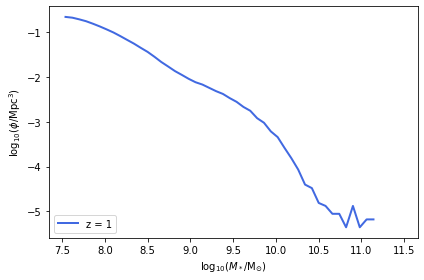

In [3]:
# Now let's plot the mass function...
# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)

# plt.title("Hydrogen Mass Function for z = 1, separating Central and Satelitte Galaxies")

# Plot the mass function
ax.plot(HImf[:, 0], np.log10(HImf[:, 1]), color="RoyalBlue", lw=2,
        label="z = 1")

# Set the axis labels - note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
plt.savefig("final_plots/HIMF/HIMF.pdf")